In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [87]:
def generate_GMM_samples(prior,number_of_samples,sig1,sig2,sig3,sig4,u1,u2,u3,u4):
    '''
    Args:
    prior of class 1 = prior[0]
    prior of class 2 = prior[1]
    prior of class 3 = prior[2]
    prior of class 4 = 1-prior[0]-prior[1]-prior[2]
    
    number_of_samples
    
    class 1- u_1, sig_1
    class 2- u_2, sig_2
    class 3- u_3, sig_3
    class 4- u_4, sig_4
    
    x is samples from zero-mean identity-covariance Gaussian sample generators

    generating class 1- A1*x+b1
    generating class 2- A2*x+b2
    generating class 3- A3*x+b3
    generating class 4- A4*x+b4
    
    '''
    from matplotlib.pyplot import figure
    txt="Plot of data sampled from 4 gaussians "
    fig = plt.figure(figsize=(20,20));
    fig.text(.35,0.09,txt,fontsize=15);
    
    samples_class1=[]
    samples_class2=[]
    samples_class3=[]
    samples_class4=[]
    
    sig_1=np.matrix(sig1)
    sig_2=np.matrix(sig2)
    sig_3=np.matrix(sig3)
    sig_4=np.matrix(sig4)
    
    u_1=np.matrix(u1).transpose()
    u_2=np.matrix(u2).transpose()
    u_3=np.matrix(u3).transpose()
    u_4=np.matrix(u4).transpose()
    
    prior=prior
    A1=np.linalg.cholesky(sig_1)
    b1=u_1

    A2=np.linalg.cholesky(sig_2)
    b2=u_2
    
    A3=np.linalg.cholesky(sig_3)
    b3=u_3
    
    A4=np.linalg.cholesky(sig_4)
    b4=u_4
        
    zero_mean=[0,0]
    cov=[[1,0],[0,1]]
    
    for i in range(number_of_samples):
        uniform_sample=np.random.uniform()

        sample_from_zero_mean_identity_covariance=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()

        if uniform_sample<prior[0]:
            '''sample from class class 1'''
            sample=A1.dot(sample_from_zero_mean_identity_covariance)+b1
            samples_class1.append(sample)
        elif (prior[0]<uniform_sample<prior[0]+prior[1]):
            '''sample from class class 2'''
            sample=A2.dot(sample_from_zero_mean_identity_covariance)+b2
            samples_class2.append(sample)
        elif (prior[0]+prior[1]<uniform_sample<prior[0]+prior[1]+prior[2]):
            '''sample from class class 3'''
            sample=A3.dot(sample_from_zero_mean_identity_covariance)+b3
            samples_class3.append(sample)
        else :
            '''sample from class class 4'''
            sample=A4.dot(sample_from_zero_mean_identity_covariance)+b4
            samples_class4.append(sample)
                
                
    samples_class1_final=np.hstack(samples_class1)
    samples_class2_final=np.hstack(samples_class2)
    samples_class3_final=np.hstack(samples_class3)
    samples_class4_final=np.hstack(samples_class4)
    
    a=np.squeeze(np.asarray(samples_class1_final.transpose()[:,1]))
    b=np.squeeze(np.asarray(samples_class1_final.transpose()[:,0]))

    c=np.squeeze(np.asarray(samples_class2_final.transpose()[:,1]))
    d=np.squeeze(np.asarray(samples_class2_final.transpose()[:,0]))

    e=np.squeeze(np.asarray(samples_class3_final.transpose()[:,1]))
    f=np.squeeze(np.asarray(samples_class3_final.transpose()[:,0]))
    
    g=np.squeeze(np.asarray(samples_class4_final.transpose()[:,1]))
    h=np.squeeze(np.asarray(samples_class4_final.transpose()[:,0]))
    
    plt.scatter(b,a,color='r',marker='*',label='class 1',s=50)
    plt.scatter(d,c,color='g',marker='*',label='class 2',s=50)
    plt.scatter(f,e,color='b',marker='*',label='class 3',s=50)
    plt.scatter(h,g,color='y',marker='*',label='class 4',s=50)
    
    np.hstack([samples_class1_final,samples_class2_final])
    return samples_class1_final,samples_class2_final

### True GMM

In [88]:
prior=[0.08,0.15,0.51,0.26]  
# prior of Gaussian 1 = prior[0]
# prior of Gaussian 2 = prior[1]
# prior of Gaussian 3 = prior[2]
# prior of Gaussian 4 = prior[3]

# mean and covariance of gaussian 1
sig1=[[.15,-.1],[.1,.15]]
u1=[-1,-1]

# mean and covariance of gaussian 2
sig2=[[.15,.1],[.1,.15]]
u2=[1,1]

# mean and covariance of gaussian 3
sig3=[[.15,.1],[-.1,.15]]
u3=[-1,1]

# mean and covariance of gaussian 4
sig4=[[.15,.1],[-.1,.15]]
u4=[1,-1]

> repeat with 10, 100, 1000, 10000 samples.

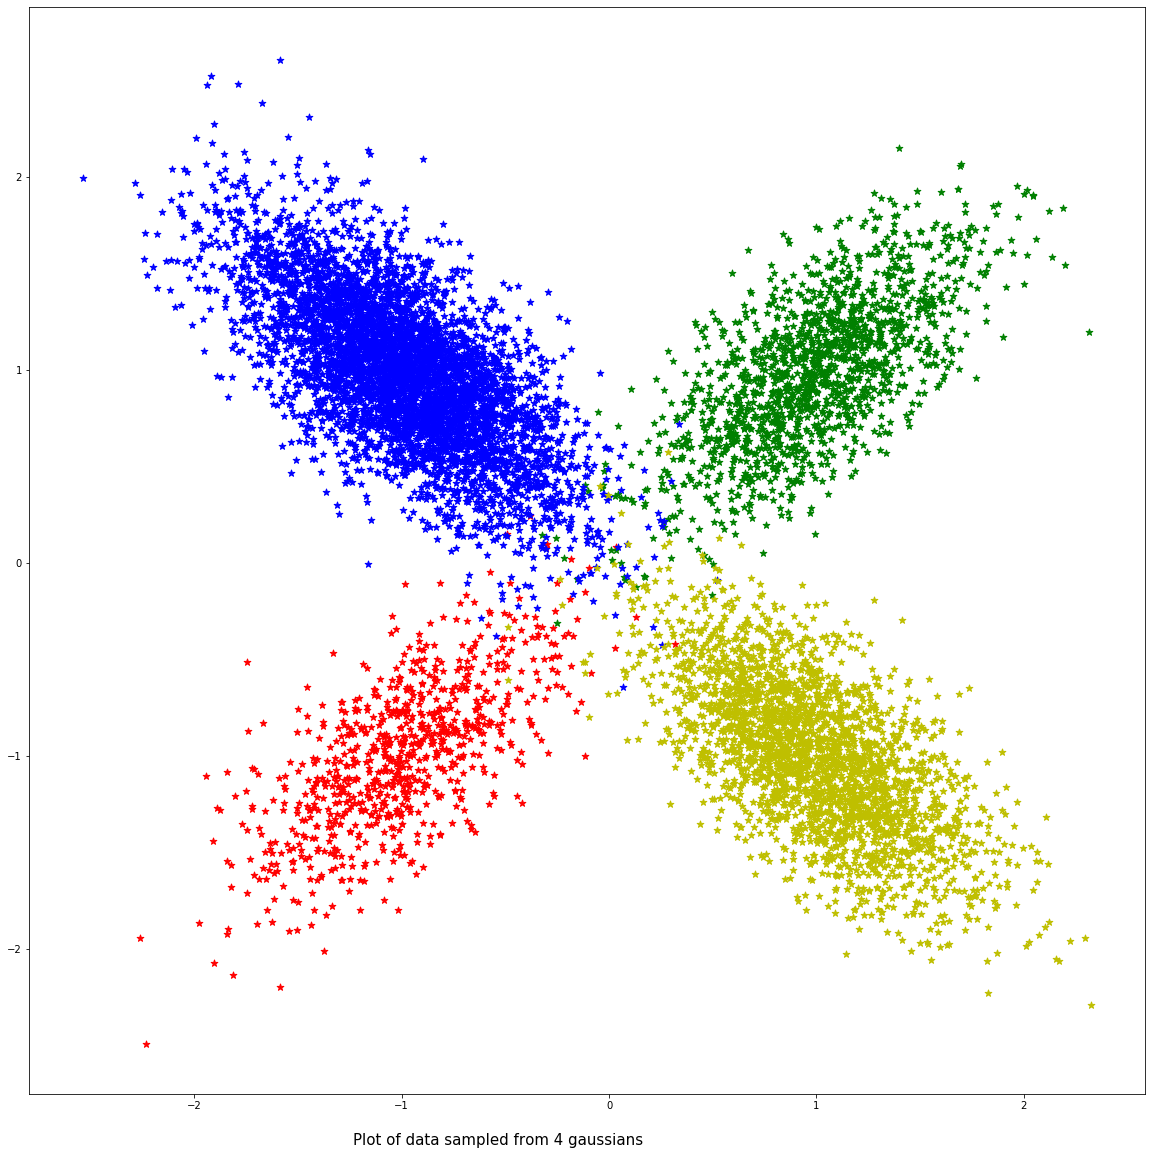

In [89]:
a,b=generate_GMM_samples(prior=prior,number_of_samples=10000,sig1=sig1,\
                     sig2=sig2,sig3=sig3,sig4=sig4,u1=u1,u2=u2,u3=u3,u4=u4);

In [91]:
a.shape

(2, 823)

In [92]:
b.shape

(2, 1538)

(2, 2361)

In [101]:
from sklearn import mixture

In [102]:
GMM_pred=mixture.GaussianMixture(n_components=4)

matrix([[-0.73478706, -0.59904224, -0.62516069, ...,  1.28231492,
          0.158313  ,  0.7796691 ],
        [-0.7629346 , -0.49266472, -0.83459447, ...,  0.84458131,
          0.40652496,  1.15684803]])

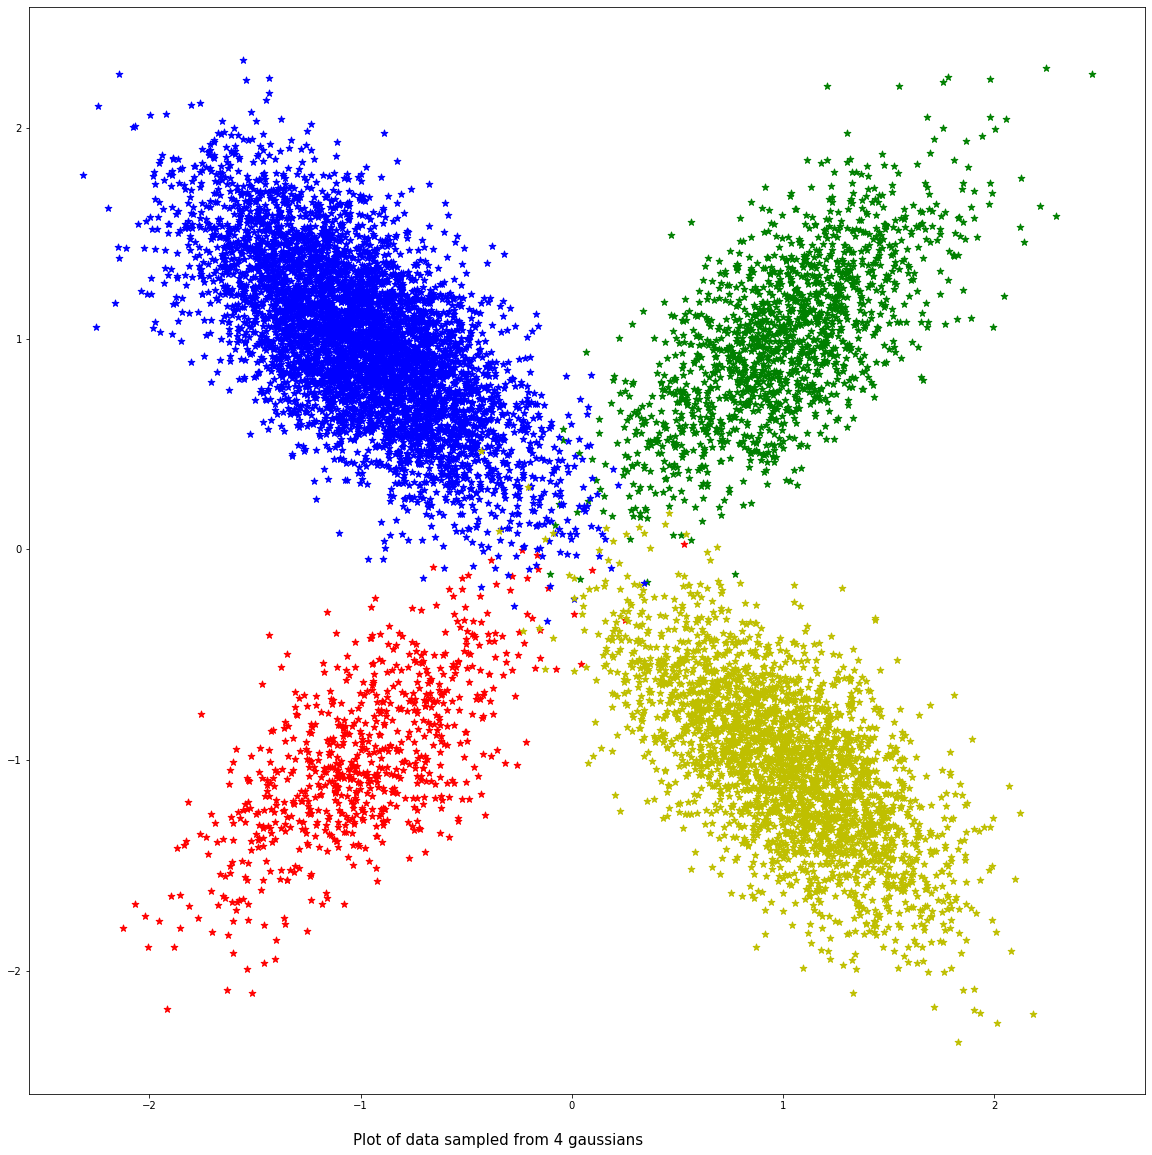

In [104]:
prior=prior
number_of_samples=10000
sig1=sig1
sig2=sig2
sig3=sig3
sig4=sig4
u1=u1
u2=u2
u3=u3
u4=u4
from matplotlib.pyplot import figure
txt="Plot of data sampled from 4 gaussians "
fig = plt.figure(figsize=(20,20));
fig.text(.35,0.09,txt,fontsize=15);

samples_class1=[]
samples_class2=[]
samples_class3=[]
samples_class4=[]

sig_1=np.matrix(sig1)
sig_2=np.matrix(sig2)
sig_3=np.matrix(sig3)
sig_4=np.matrix(sig4)

u_1=np.matrix(u1).transpose()
u_2=np.matrix(u2).transpose()
u_3=np.matrix(u3).transpose()
u_4=np.matrix(u4).transpose()

prior=prior
A1=np.linalg.cholesky(sig_1)
b1=u_1

A2=np.linalg.cholesky(sig_2)
b2=u_2

A3=np.linalg.cholesky(sig_3)
b3=u_3

A4=np.linalg.cholesky(sig_4)
b4=u_4
    
zero_mean=[0,0]
cov=[[1,0],[0,1]]

for i in range(number_of_samples):
    uniform_sample=np.random.uniform()

    sample_from_zero_mean_identity_covariance=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()

    if uniform_sample<prior[0]:
        '''sample from class class 1'''
        sample=A1.dot(sample_from_zero_mean_identity_covariance)+b1
        samples_class1.append(sample)
    elif (prior[0]<uniform_sample<prior[0]+prior[1]):
        '''sample from class class 2'''
        sample=A2.dot(sample_from_zero_mean_identity_covariance)+b2
        samples_class2.append(sample)
    elif (prior[0]+prior[1]<uniform_sample<prior[0]+prior[1]+prior[2]):
        '''sample from class class 3'''
        sample=A3.dot(sample_from_zero_mean_identity_covariance)+b3
        samples_class3.append(sample)
    else :
        '''sample from class class 4'''
        sample=A4.dot(sample_from_zero_mean_identity_covariance)+b4
        samples_class4.append(sample)
            
            
samples_class1_final=np.hstack(samples_class1)
samples_class2_final=np.hstack(samples_class2)
samples_class3_final=np.hstack(samples_class3)
samples_class4_final=np.hstack(samples_class4)

a=np.squeeze(np.asarray(samples_class1_final.transpose()[:,1]))
b=np.squeeze(np.asarray(samples_class1_final.transpose()[:,0]))

c=np.squeeze(np.asarray(samples_class2_final.transpose()[:,1]))
d=np.squeeze(np.asarray(samples_class2_final.transpose()[:,0]))

e=np.squeeze(np.asarray(samples_class3_final.transpose()[:,1]))
f=np.squeeze(np.asarray(samples_class3_final.transpose()[:,0]))

g=np.squeeze(np.asarray(samples_class4_final.transpose()[:,1]))
h=np.squeeze(np.asarray(samples_class4_final.transpose()[:,0]))

plt.scatter(b,a,color='r',marker='*',label='class 1',s=50)
plt.scatter(d,c,color='g',marker='*',label='class 2',s=50)
plt.scatter(f,e,color='b',marker='*',label='class 3',s=50)
plt.scatter(h,g,color='y',marker='*',label='class 4',s=50)

np.hstack([samples_class1_final,samples_class2_final])


In [109]:
data=np.hstack([samples_class1_final,samples_class2_final,samples_class3_final,samples_class4_final])

In [112]:
data.T.shape

(10000, 2)

In [113]:
GMM_pred.fit(data.T)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [117]:
GMM_pred.bic(data.T)

36139.75780083085

In [ ]:
prior=[0.08,0.15,0.51,0.26]  
# prior of Gaussian 1 = prior[0]
# prior of Gaussian 2 = prior[1]
# prior of Gaussian 3 = prior[2]
# prior of Gaussian 4 = prior[3]

# mean and covariance of gaussian 1
sig1=[[.15,-.1],[.1,.15]]
u1=[-1,-1]

# mean and covariance of gaussian 2
sig2=[[.15,.1],[.1,.15]]
u2=[1,1]

# mean and covariance of gaussian 3
sig3=[[.15,.1],[-.1,.15]]
u3=[-1,1]

# mean and covariance of gaussian 4
sig4=[[.15,.1],[-.1,.15]]
u4=[1,-1]